In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

## Import Data

In [2]:
# import eps data
earnings_path = 'data\\processed\\df_quarter_eps_average_08_09.csv'
key_path = 'data\\processed\\df_price07_18.csv'

df = pd.read_csv(earnings_path)
df.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df.index = df['Stock']
df.drop('Stock', axis=1, inplace = True)

df_key = pd.read_csv(key_path)
df_key.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
new = df_key['Stock'].str.split('_', expand=True)

df_key['symbol'] = new[0]
df_key['company'] = new[1]
df_key.index = df_key['symbol']
df_key = df_key[['symbol', 'company']]
df_key.sort_index(inplace=True)

#df
#df_key

## Limit stocks to SP500 that traded daily throughout the duration

In [3]:
# define indices

idx_key = df_key.index
idx = df.index

# drop stocks from eps dataframe

idx_diff1 = idx.difference(idx_key)
df.drop(idx_diff1, inplace=True)
df.shape

(355, 2)

## Exploratory Scatterplot

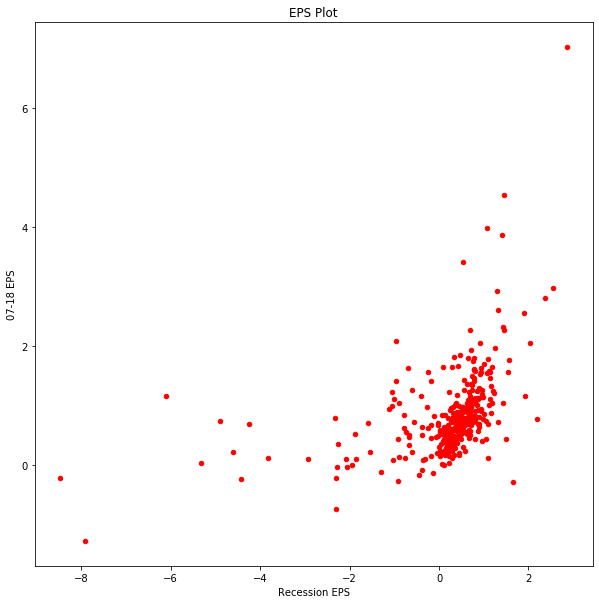

In [4]:
# eps plot

df.plot(kind='scatter', x='Recession EPS', y='07-18 EPS', title='EPS Plot', figsize=(10,10), color='r')

## Implementing Hypothesis - EPS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


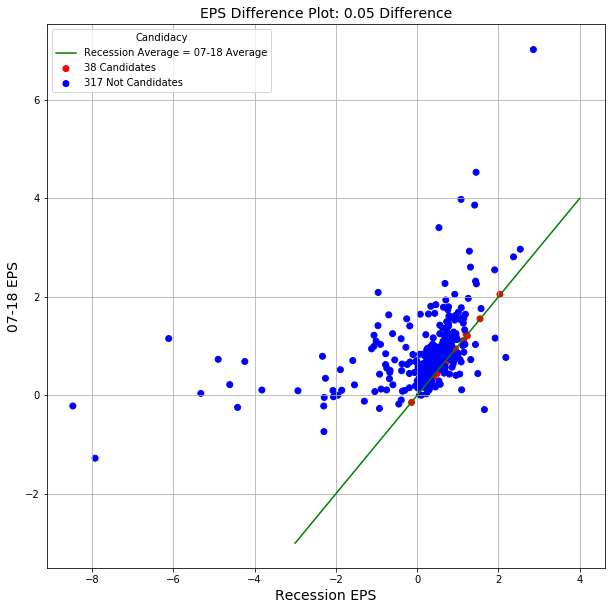

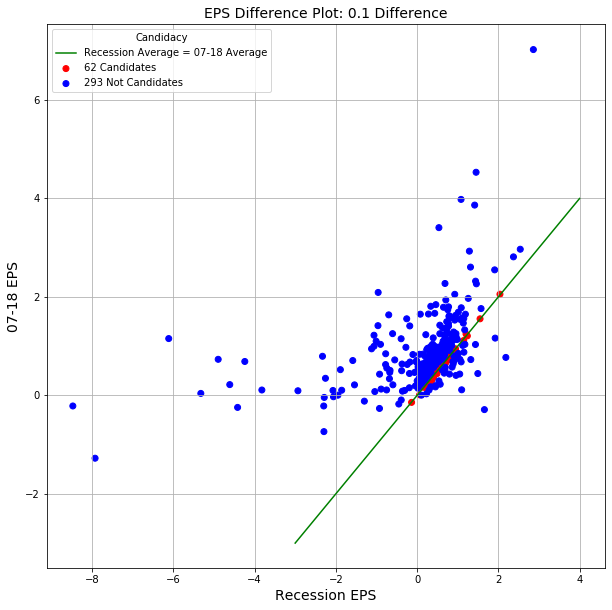

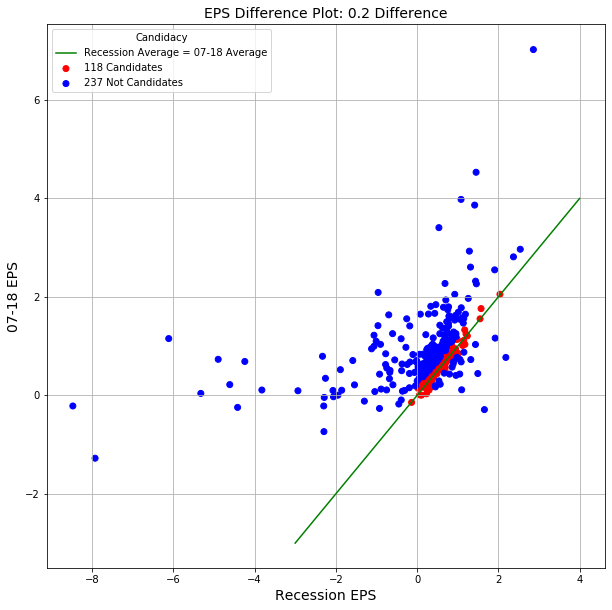

In [6]:
# define colors assignment

colors = {1:'red', 0:'blue'}
sub_title_font =14
legend_font =8
axis_font = 10
x = np.linspace(-3, 4, 100)
y=x

for diff in [0.05, 0.1, 0.2]:
    df['hypothesis']=np.where(abs(df['Recession EPS']-df['07-18 EPS']) <= diff, 1, 0)

    df_cand = df[df['hypothesis']==1]
    df_not = df[df['hypothesis']==0]
    
    df_cand['colors'] = 'red'
    df_not['colors'] = 'blue'
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    cand = ax.scatter(df_cand['Recession EPS'], df_cand['07-18 EPS'], c=df_cand.colors, label='{} Candidates'.format(len(df_cand.index)))
    not_cand = ax.scatter(df_not['Recession EPS'], df_not['07-18 EPS'], c=df_not.colors, label='{} Not Candidates'.format(len(df_not.index)))
    line = ax.plot(x, y, c="green", label='Recession Average = 07-18 Average')

    plt.xlabel('Recession EPS', fontsize=sub_title_font)
    plt.ylabel('07-18 EPS', fontsize=sub_title_font)
    plt.title('EPS Difference Plot: {} Difference'.format(diff), fontsize=sub_title_font)
    ax.tick_params(axis="x", labelsize=axis_font)
    ax.tick_params(axis="y", labelsize=axis_font)

    plt.grid(which='major')
    ax.legend(loc = 'upper left', title='Candidacy')
    plt.show()

## Filter stocks to ideal Candidate pool

### Let's pick the top 20% of resistant stocks for our pool

In [9]:
# build candidate pool from EPS

ratio_eps = int(round(len(df.index)*0.2))
df_eps_cand = df
df_eps_cand['difference'] = abs(df['Recession EPS']-df['07-18 EPS'])
df_eps_cand.sort_values(by=['difference'], inplace=True)
df_eps_cand = df_eps_cand.iloc[0:ratio_eps, [0, 1, 3]]

In [10]:
# this looks right

df_eps_cand

,Recession EPS,07-18 EPS,difference
Stock,,,
DHR,0.9475,0.946458,0.001042
WMB,0.1950,0.198958,0.003958
XOM,1.5500,1.555833,0.005833
SBAC,-0.1350,-0.141646,0.006646
HRL,0.5250,0.532708,0.007708
...,...,...,...
CERN,0.6225,0.515208,0.107292
PG,1.1225,1.015000,0.107500
EMR,0.6250,0.735000,0.110000
